In [2]:
##LIBRARY LOADING ZONE - Stand clear!##

#Data storage and analysis library
import pandas as pd
import numpy as np 
import scipy
from scipy import stats

#Graphing and figure generation library
import matplotlib as mpl
import matplotlib.pyplot as plt

#PCA analysis library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
##DATA FRAME GENERATION AND INITIAL VISUALIZATION##
datatemp = "Maxwell_MarSOC_dataset.csv"
df = pd.read_csv(datatemp, sep=",")

#EXTRANEOUS DATA COLUMN REMOVAL#
'''
We will be removing extraneous columns to make it easier to process and visualize the data, primarily
qualitative data like source, data_type, and quantiative data columns without data or
quantitative data that is not going to be used in our analysis (like pre-made statistical
data columns). 
''' 
dfmod = df.drop(['Source', 'Original_source', 'Data_type', 'Site', 'Core', 'Soil_type', 
                 'accuracy_flag', 'Country', 'Admin_unit', 'Year_collected', 'Year_collected_end', 
                 'Method', 'Conv_factor', 'SOM_perc', 'N_perc', 'Time_replicate', 'Treatment', 'n_cores', 
                 'SOM_perc_mean', 'SOM_perc_sd', 'OC_perc_mean', 'OC_perc_sd', 'OC_perc_se', 'BD_g_cm3_mean',
                 'BD_g_cm3_sd', 'BD_g_cm3_se', 'OC_from_SOM_our_eq', 'OC_obs_est', 'OC_perc_final', 'Notes', 
                 'DOI'], axis =1)

#QUALITATIVE AND QUANTITATIVE REMOVAL#
'''
"dfmod", the modified data frame is again modified to separate the qualitative from the quantitative data
to prevent any issues later on when calculations like the mean, median, and standard deviation of variables 
must be calculated (given that finding the mean of a string would be inadvisable). This new dataframe that 
will be used for the initial 'ground level analysis' will be called dfquant. 
'''
dfquant = dfmod.drop(['Plot', 'Site_name'], axis =1) 

#NAN AND BLANK DATA REMOVAL#
'''
Some of the samples in the critical variables we will be using to determine the validity of the hypothesis
lack data points, which have either been saved as NAN (not a number) or a blank value (" "). The dfquant will
be converted to dfquantr (df quantified refined). 
'''
dfquantr = dfquant.dropna()

In [4]:
##GROUND LEVEL ANALYSIS - Mean##
meap = dfquant.mean(axis=0)
print(f'The means for the dataset are: {meap}')

The means for the dataset are: Latitude     36.708626
Longitude     3.246834
U_depth_m     0.247768
L_depth_m     0.302382
OC_perc       5.454991
BD_g_cm3      0.713473
dtype: float64


In [5]:
##GROUND LEVEL ANALYSIS - Median##
mediap = dfquant.median(axis=0)
print(f'The medians for the dataset are: {mediap}')

The medians for the dataset are: Latitude     51.620693
Longitude    -2.891506
U_depth_m     0.180000
L_depth_m     0.220000
OC_perc       3.158537
BD_g_cm3      0.633864
dtype: float64


In [6]:
##GROUND LEVEL ANALYSIS - Standard deviation##
stdp = dfquantr.std(axis=0)
print(f'The standard deviations for the dataset are: {stdp}')

The standard deviations for the dataset are: Latitude     33.695066
Longitude    54.189562
U_depth_m     0.260125
L_depth_m     0.286533
OC_perc       6.597933
BD_g_cm3      0.436198
dtype: float64


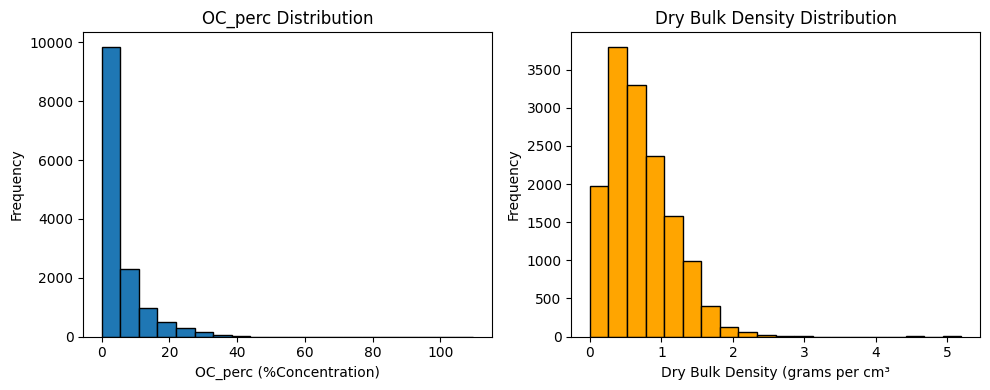

Latitude


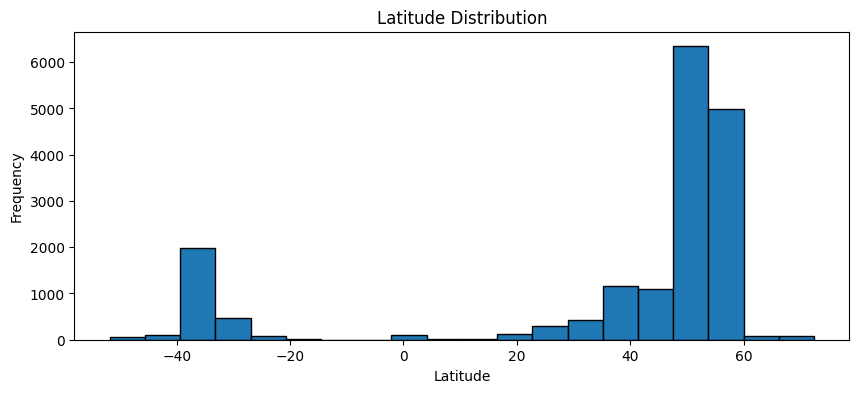

Longitude


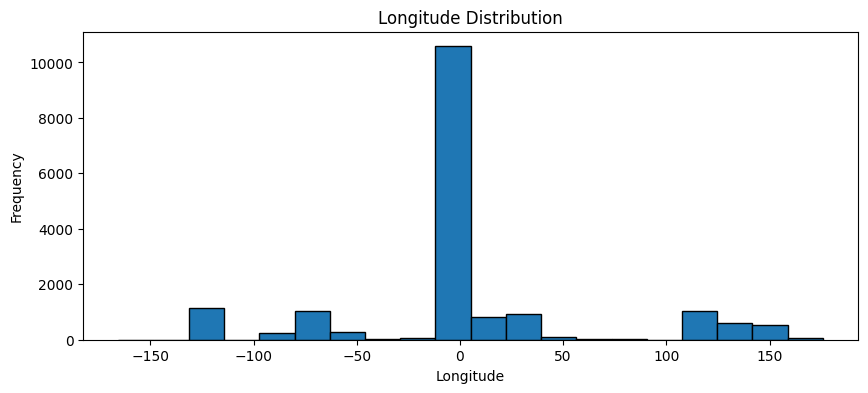

U_depth_m


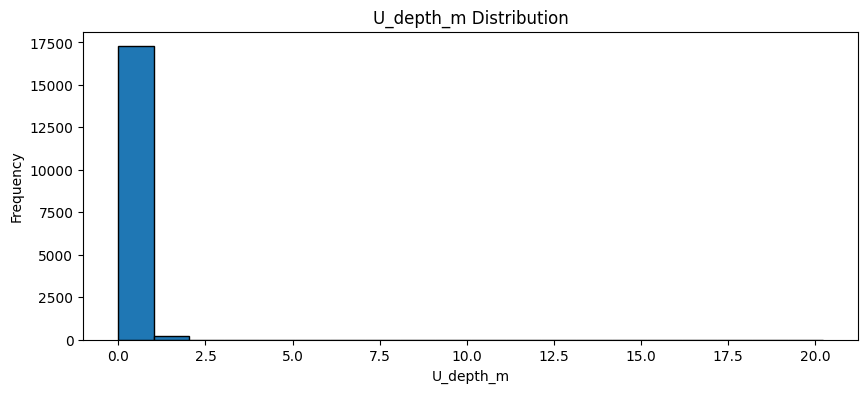

L_depth_m


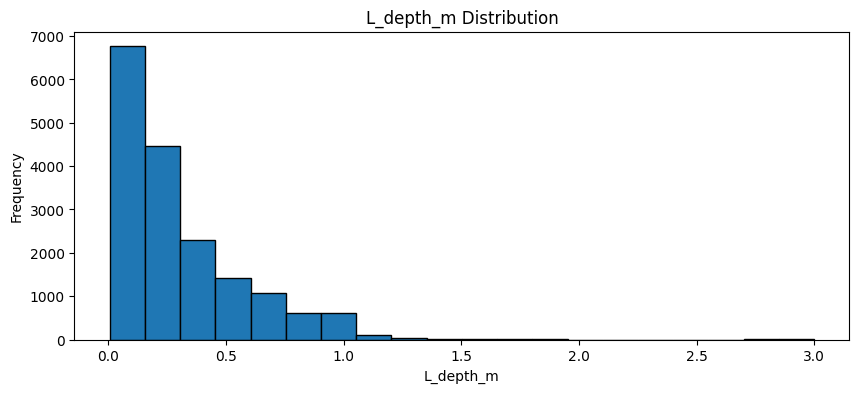

OC_perc


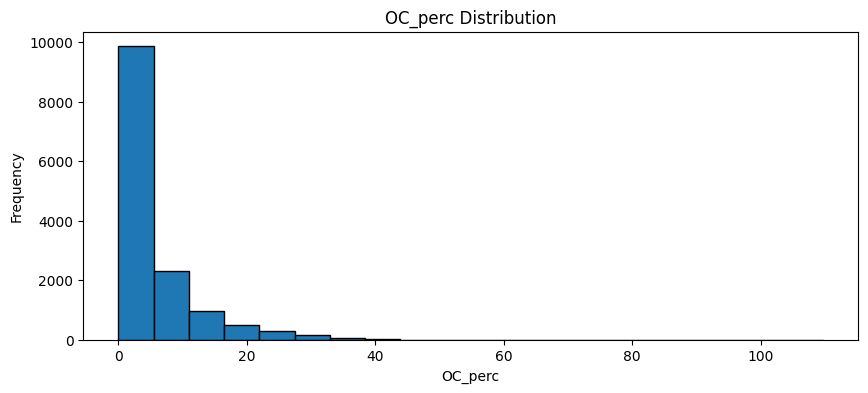

BD_g_cm3


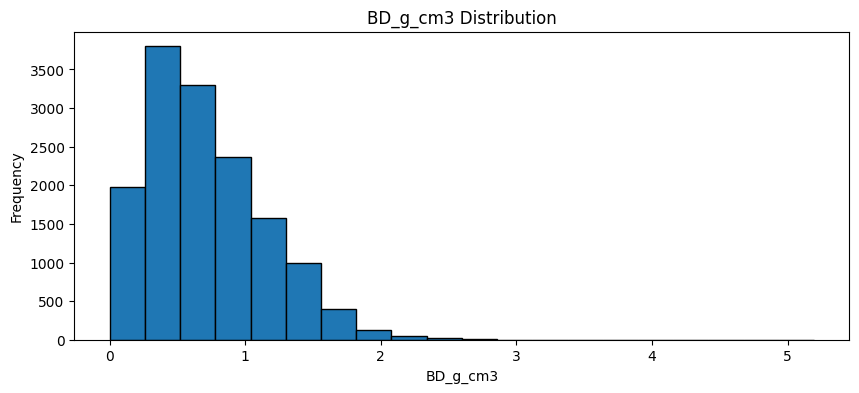

In [7]:
##HISTOGRAM GENERATION##
'''
The two most important variables to our analysis are the dry bulk density and soil organic carbon (OC_perc), and thus
they were selected to have histograms generated of them. 
'''
fig,ax = plt. subplots(1, 2, figsize = (10,4))

#OC_Perc HISTOGRAM#
ax[0].hist(dfquant["OC_perc"], bins=20, edgecolor='black')
ax[0].set_title("OC_perc Distribution")
ax[0].set_xlabel("OC_perc (%Concentration)")
ax[0].set_ylabel("Frequency")

#DRY BULK DENSITY HISTOGRAM#
ax[1].hist(dfquant["BD_g_cm3"], bins=20, edgecolor='black', color='orange')
ax[1].set_title("Dry Bulk Density Distribution")
ax[1].set_xlabel("Dry Bulk Density (grams per cm³")
ax[1].set_ylabel("Frequency")

fig.savefig("side_by_side_histograms.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#ALL VARIABLES HISTOGRAMS (FOR SUPPLEMENTARY FIGURES)#
for i in dfquantr:
    print(i)
    fig,ax = plt.subplots(figsize = (10,4))
    ax.hist(dfquant[i], bins=20, edgecolor='black')
    ax.set_title(f'{i} Distribution')
    ax.set_xlabel(i)
    ax.set_ylabel("Frequency")
    fig.savefig(f'{i}_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()

SignificanceResult(statistic=-0.7274432112457379, pvalue=0.0)
PearsonRResult(statistic=-0.5554409386151382, pvalue=0.0)
y = -8.402x+12.033, r = -0.555, p = 0.0


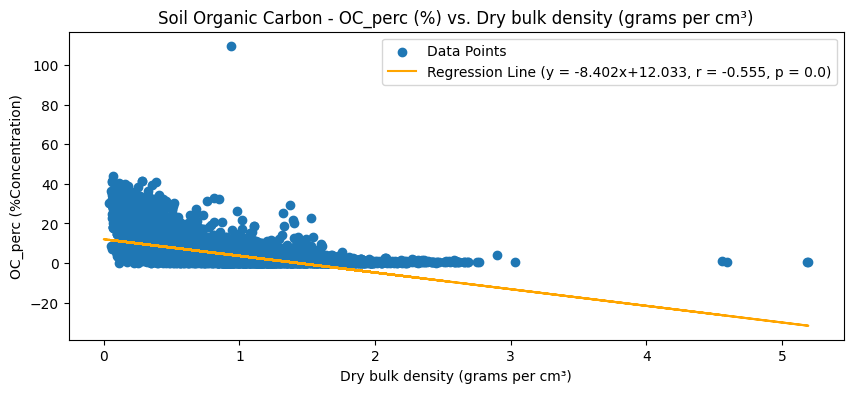

In [8]:
##LINEAR REGRESSION AND OTHER TWO VARIABLE ANALYSIS##

#SPEARMAN AND PEARSON#
'''
The two most critical variables to the hypothesis are dry bulk density (BD_g_cm3) and OC_perc, given that the hypothesis states that SOC will 
decrease with higher dry bulk density. The spearman and pearson are calculated between these two categories below.
'''
spearres = stats.spearmanr(dfquantr['BD_g_cm3'], dfquantr['OC_perc'])
pearres = stats.pearsonr(dfquantr['BD_g_cm3'], dfquantr['OC_perc'])
print(spearres)
print(pearres)

#LINEAR REGRESSION#
linR = scipy.stats.linregress(dfquantr['BD_g_cm3'], dfquantr['OC_perc'])
m = np.round(linR.slope,3) 
b = np.round(linR.intercept,3)
r = np.round(linR.rvalue, 3)
p = linR.pvalue
print(f'y = {m}x+{b}, r = {r}, p = {p}')

#SCATTERPLOT AND LINEAR REGRESSION#
fig, ax = plt.subplots(figsize = (10, 4))
plt.scatter(dfquant['BD_g_cm3'], dfquant['OC_perc'], label = "Data Points")
plt.plot(dfquant['BD_g_cm3'], m*(dfquant['BD_g_cm3'])+b, color = 'orange', label = f'Regression Line (y = {m}x+{b}, r = {r}, p = {p})')
plt.xlabel('Dry bulk density (grams per cm³)')
plt.ylabel('OC_perc (%Concentration)')
plt.title('Soil Organic Carbon - OC_perc (%) vs. Dry bulk density (grams per cm³)')
plt.legend()
fig.savefig('linear_correlation.png', dpi = 300, bbox_inches='tight')
plt.show()

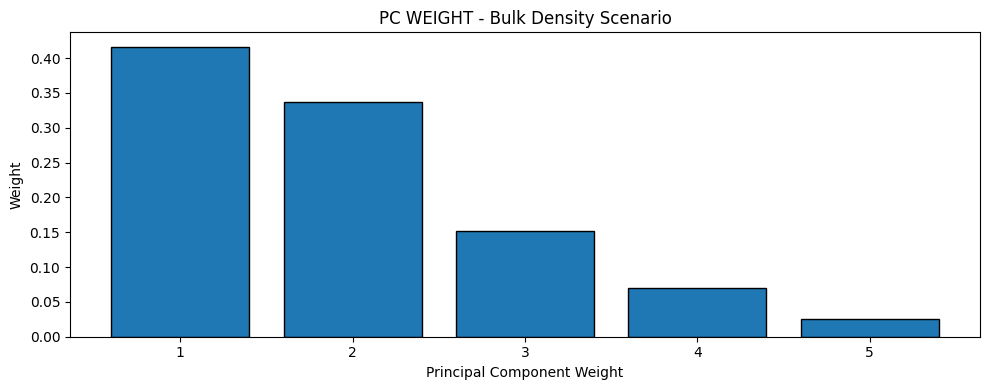

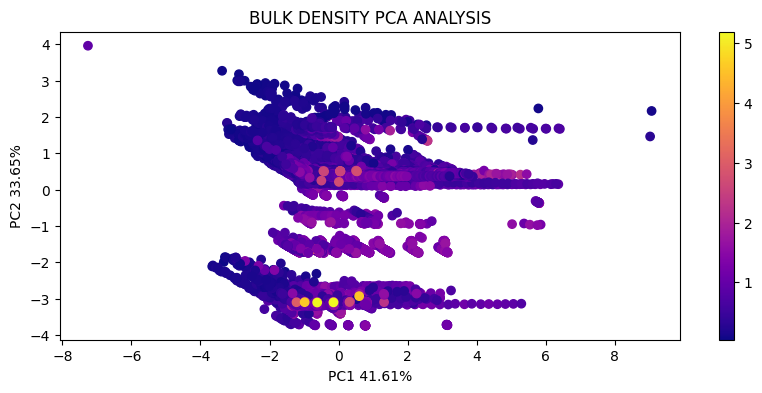

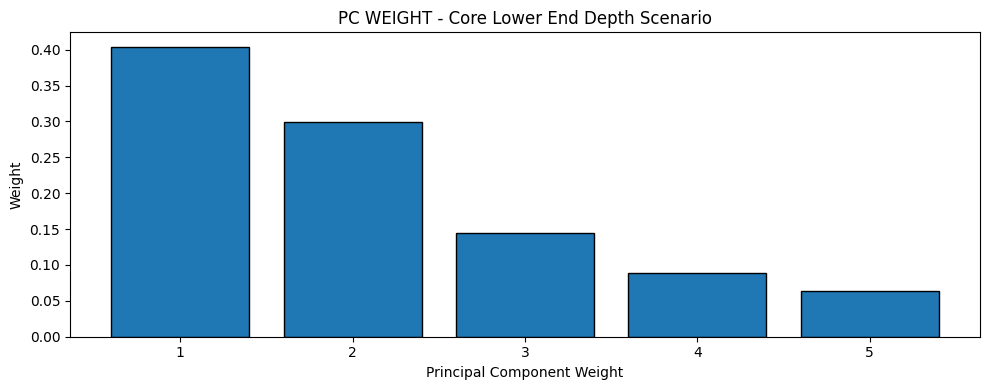

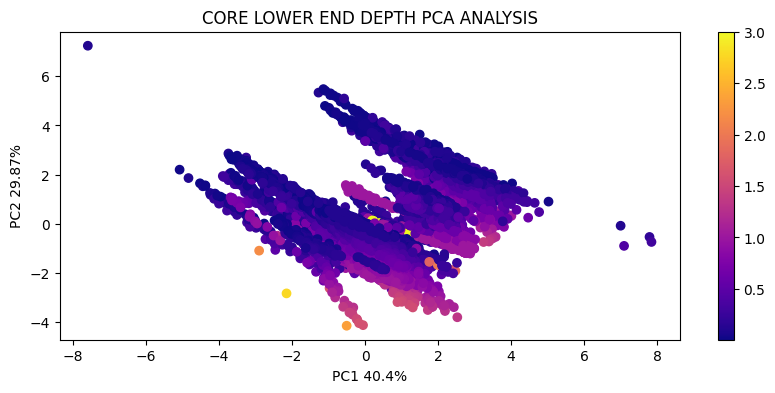

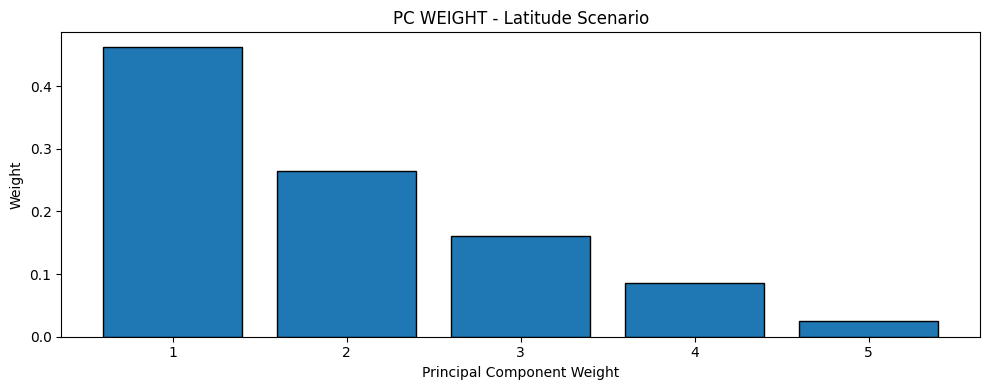

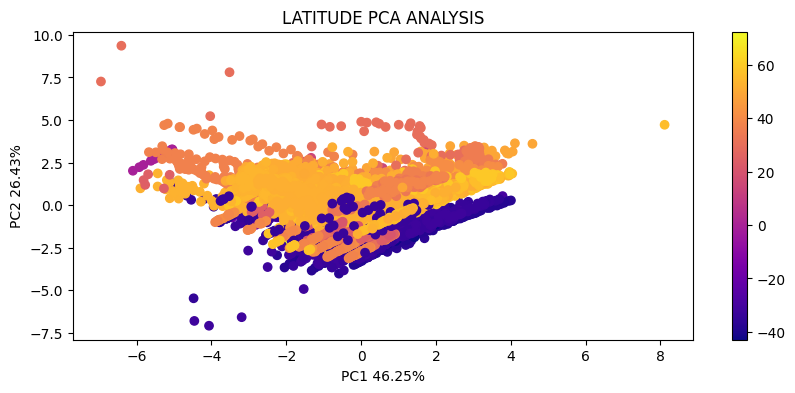

In [19]:
##PCA ANALYSIS##

#-PCA FOR BD_g_cm3-#
#DATA SCALING#
dfclean = dfquantr.drop('BD_g_cm3', axis =1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)

#PCA CODE#
pca = PCA(n_components = 0.99)
PCs = pca.fit_transform(scaled_data)
#PCA EXPLAINED VARIANCE RATIO GRAPH GENERATION#
pc_weights = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(np.arange(1, len(pc_weights)+1), pc_weights, edgecolor='black')
plt.xlabel('Principal Component Weight')
plt.ylabel('Weight')
plt.title('PC WEIGHT - Bulk Density Scenario')
plt.xticks(np.arange(1, len(pc_weights)+1))
plt.tight_layout()
fig.savefig('BDPCAweightgraph.png', dpi = 300, bbox_inches='tight')
plt.show()

#PCA1 AND PCA2 ANALYSIS#
fig,ax = plt.subplots(figsize = (10,4))
pc1pct = str(round(pca.explained_variance_ratio_[0]*100, 2))
pc2pct = str(round(pca.explained_variance_ratio_[1]*100, 2))
ax.set_xlabel("PC1 " + pc1pct +"%")
ax.set_ylabel("PC2 " + pc2pct + "%")
ax.set_title("BULK DENSITY PCA ANALYSIS")
sc = ax.scatter(PCs[:,0], PCs[:, 1], c = dfquantr['BD_g_cm3'], cmap = "plasma")
plt.colorbar(sc, ax=ax)
fig.savefig(f'BULKDENSITY_PCAANALYSIS.png', dpi=300, bbox_inches='tight')

#-PCA FOR L_depth_m-#
#DATA SCALING#
dfclean = dfquantr.drop('L_depth_m', axis =1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)

#PCA CODE#
pca = PCA(n_components = 0.99)
PCs = pca.fit_transform(scaled_data)
#PCA EXPLAINED VARIANCE RATIO GRAPH GENERATION#
pc_weights = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(np.arange(1, len(pc_weights)+1), pc_weights, edgecolor='black')
plt.xlabel('Principal Component Weight')
plt.ylabel('Weight')
plt.title('PC WEIGHT - Core Lower End Depth Scenario')
plt.xticks(np.arange(1, len(pc_weights)+1))
plt.tight_layout()
fig.savefig('LDEPTPCAweightgraph.png', dpi = 300, bbox_inches='tight')
plt.show()

#PCA1 AND PCA2 ANALYSIS#
fig,ax = plt.subplots(figsize = (10,4))
pc1pct = str(round(pca.explained_variance_ratio_[0]*100, 2))
pc2pct = str(round(pca.explained_variance_ratio_[1]*100, 2))
ax.set_xlabel("PC1 " + pc1pct +"%")
ax.set_ylabel("PC2 " + pc2pct + "%")
ax.set_title("CORE LOWER END DEPTH PCA ANALYSIS")
sc = ax.scatter(PCs[:,0], PCs[:, 1], c = dfquantr['L_depth_m'], cmap = "plasma")
plt.colorbar(sc, ax=ax)
fig.savefig(f'LOWERDEPTH_PCAANALYSIS.png', dpi=300, bbox_inches='tight')

#-PCA FOR Latitude-#
#DATA SCALING#
dfclean = dfquantr.drop('Latitude', axis =1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)

#PCA CODE#
pca = PCA(n_components = 0.99)
PCs = pca.fit_transform(scaled_data)
#PCA EXPLAINED VARIANCE RATIO GRAPH GENERATION#
pc_weights = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(np.arange(1, len(pc_weights)+1), pc_weights, edgecolor='black')
plt.xlabel('Principal Component Weight')
plt.ylabel('Weight')
plt.title('PC WEIGHT - Latitude Scenario')
plt.xticks(np.arange(1, len(pc_weights)+1))
plt.tight_layout()
fig.savefig('LATPCAweightgraph.png', dpi = 300, bbox_inches='tight')
plt.show()

#PCA1 AND PCA2 ANALYSIS#
fig,ax = plt.subplots(figsize = (10,4))
pc1pct = str(round(pca.explained_variance_ratio_[0]*100, 2))
pc2pct = str(round(pca.explained_variance_ratio_[1]*100, 2))
ax.set_xlabel("PC1 " + pc1pct +"%")
ax.set_ylabel("PC2 " + pc2pct + "%")
ax.set_title("LATITUDE PCA ANALYSIS")
sc = ax.scatter(PCs[:,0], PCs[:, 1], c = dfquantr['Latitude'], cmap = "plasma")
plt.colorbar(sc, ax=ax)
fig.savefig(f'LATITUDE_PCAANALYSIS.png', dpi=300, bbox_inches='tight')
